In [278]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

In [284]:
x = np.random.randn(500, 2) # rand : [0, 1], randn 정규분포
x.shape

(500, 2)

In [285]:
x0 = x[:,0]
x1 = x[:,1]
y0 = np.sqrt(x0**2 + x1**2) < 0.8
y1 = np.sqrt(x0**2 + x1**2) > 1.2

In [286]:
x0 = x[y0]
x1 = x[y1]
x = np.concatenate((x0, x1), axis=0) 
y = np.concatenate((np.zeros(len(x0)), np.ones(len(x1))), axis=0) 
#y = np.concatenate((x0[:,0]*0, x1[:,0]*0+1), axis=0) 
x0.shape, x1.shape, x.shape, y.shape

((129, 2), (246, 2), (129, 2), (246, 2), (375, 2), (375,))

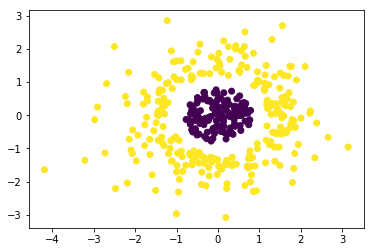

In [287]:
plt.scatter(x[:,0], x[:,1], c=y)

In [251]:
from sklearn.linear_model import LogisticRegression

In [252]:
model = LogisticRegression().fit(x,y)
model.score(x,y) #0.64

C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.6788511749347258

In [253]:
import tensorflow.contrib.layers as layers

In [254]:
x = x / np.max(x)
np.max(x)

1.0

In [ ]:
tf.reset_default_graph()
X = tf.placeholder(tf.float32, [None, 2])
Y = tf.placeholder(tf.int32, [None])
hidden = layers.fully_connected(X, num_outputs=5) # 히든레이어 만들기 
z = layers.fully_connected(hidden, num_outputs=2)
h = tf.nn.softmax(z)
cost = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=Y, logits=z)#logits 은 softmax 하기 전의 값
cost = tf.reduce_mean(cost)
train = tf.train.GradientDescentOptimizer(0.1).minimize(cost)
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [259]:
for i in range(1000): # 에포크
    _, _cost = sess.run([train, cost], {X:x, Y:y})
p = np.argmax( sess.run(h, {X:x} ) , axis=-1)
_cost, accuracy_score(y, p)

(0.2717718, 0.9451697127937336)

In [260]:
np.argmax( sess.run(h, {X:x} ), axis=-1)

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,